In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
fashion_train =pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test =pd.read_csv('fashion-mnist_test.csv', sep=',')

In [4]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.isnull().any()

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool

In [6]:
fashion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test.isnull().any()

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool

In [9]:
fashion_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [10]:
training = np.array(fashion_train, dtype = 'float64')
testing = np.array(fashion_test, dtype = 'float64')

9.0

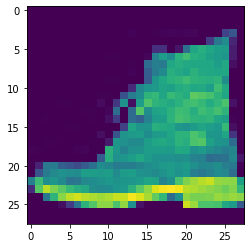

In [11]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i, 0]
label

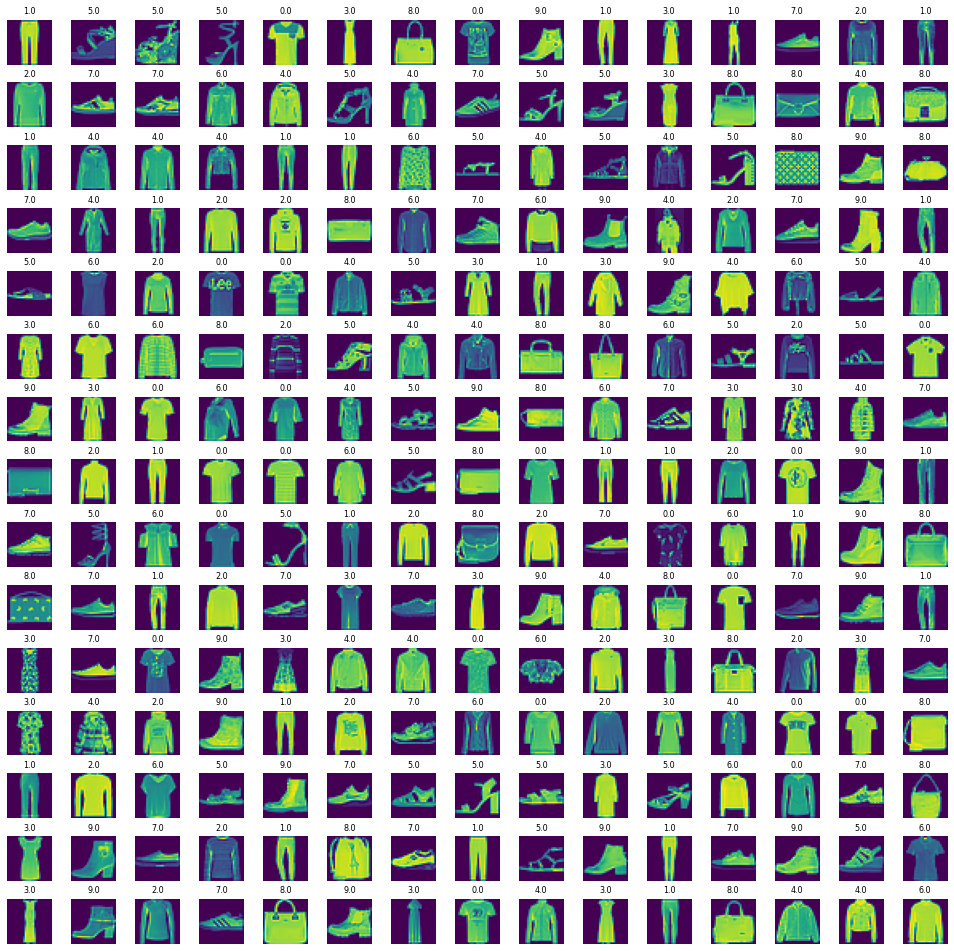

In [12]:
#viewing the image in the grid format
#define the dimension of the plot grid
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid,w_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15x15 into 225 array
n_training = len(training)
#select a random number from 0 to n_training, create evenly spaced variabes
for i in np.arange(0, w_grid*l_grid):
    #select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')#to avoid showing the number of pixel
plt.subplots_adjust(hspace=0.4)

In [13]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [14]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [16]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

##### Training The Model

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
X_train.shape,X_test.shape,X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [19]:
cnn_model = Sequential()

In [20]:
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation='relu' ))

In [21]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
cnn_model.add(Conv2D(32,(2,2), activation='relu'))

In [23]:
cnn_model.add(Flatten())

In [24]:
cnn_model.add(Dense(128, activation='relu'))#kind of the hidden layer

In [25]:
cnn_model.add(Dense(10, activation='sigmoid'))

In [26]:
# cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
epochs = 50 # how many times we will be representing our training dataset and update the weight as we proceed

In [28]:
cnn_model.fit(X_train, y_train, batch_size=512, epochs=epochs, verbose = 1, validation_data=(X_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 4s 41ms/step - loss: 1.2251 - accuracy: 0.5618 - val_loss: 0.7692 - val_accuracy: 0.7196
Epoch 2/50
94/94 [==============================] - 4s 38ms/step - loss: 0.7109 - accuracy: 0.7277 - val_loss: 0.6511 - val_accuracy: 0.7578
Epoch 3/50
94/94 [==============================] - 4s 37ms/step - loss: 0.6184 - accuracy: 0.7658 - val_loss: 0.5934 - val_accuracy: 0.7808
Epoch 4/50
94/94 [==============================] - 3s 35ms/step - loss: 0.5695 - accuracy: 0.7888 - val_loss: 0.5453 - val_accuracy: 0.8012
Epoch 5/50
94/94 [==============================] - 3s 35ms/step - loss: 0.5325 - accuracy: 0.8048 - val_loss: 0.5285 - val_accuracy: 0.8048
Epoch 6/50
94/94 [==============================] - 3s 35ms/step - loss: 0.5096 - accuracy: 0.8123 - val_loss: 0.5006 - val_accuracy: 0.8203
Epoch 7/50
94/94 [==============================] - 3s 37ms/step - loss: 0.4906 - accuracy: 0.8203 - val_loss: 0.4857 - val_accuracy: 0.8212
Epoch 8/50
94

##### EVALUATION

In [29]:
evaluate = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluate[1]))#shows the test accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3193 - accuracy: 0.8831
Test Accuracy: 0.883


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


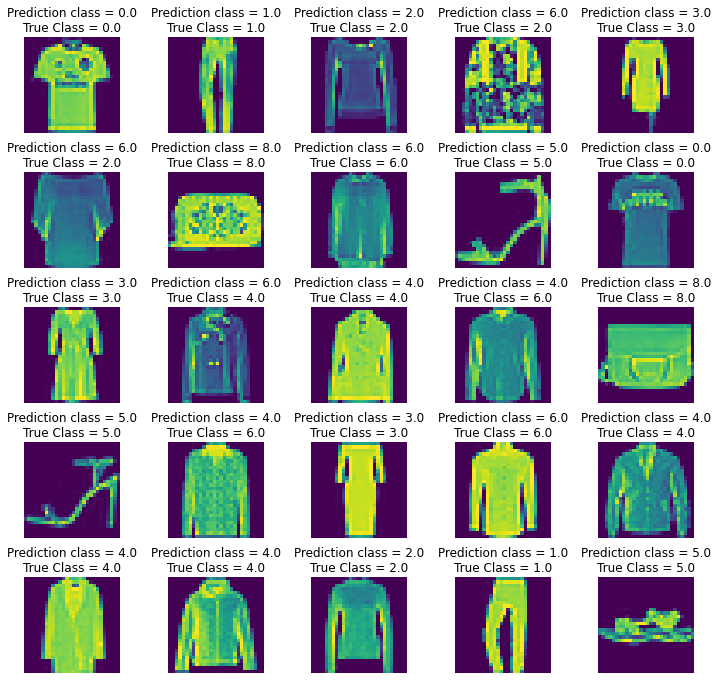

In [30]:
predicted_classes = cnn_model.predict_classes(X_test)
length=5
width =5
fig, axes = plt.subplots(length, width, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, length*width):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction class = {:0.1f}\nTrue Class = {:0.1f}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

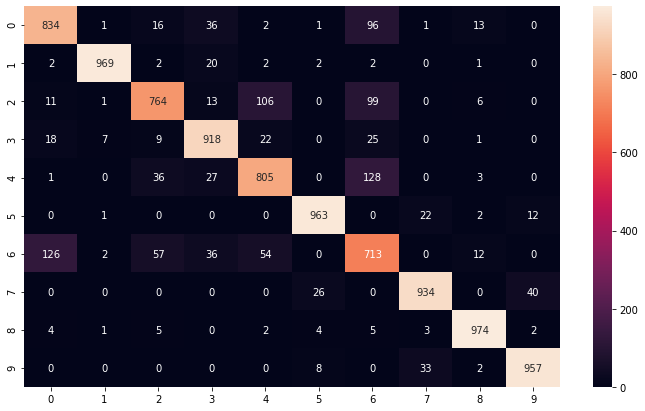

In [32]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot = True, fmt='d')

In [33]:
num_classes =10 # total number of classes
target_names = ['class{}'.format(i) for i in range(num_classes)]

In [34]:
print(classification_report(y_test,predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

      class0       0.84      0.83      0.84      1000
      class1       0.99      0.97      0.98      1000
      class2       0.86      0.76      0.81      1000
      class3       0.87      0.92      0.90      1000
      class4       0.81      0.81      0.81      1000
      class5       0.96      0.96      0.96      1000
      class6       0.67      0.71      0.69      1000
      class7       0.94      0.93      0.94      1000
      class8       0.96      0.97      0.97      1000
      class9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [35]:
cnn_model.save('CodeRheama.h5')

In [36]:
cnn_model.save('ReamaDeploy.hdf5')